### 回帰 $\rightarrow$ 回帰木 (sklearn.tree.DecisionTreeRegressor)

In [1]:
# bostonデータをロード
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# データフレーム形式に変換
# カラム名を説明変数に設定
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

# 先頭５行を表示
print(boston_df.head(), "\n")

# カラム名を表示
print(boston_df.columns, "\n") 

# 形状を確認
print(boston_df.shape) 

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns] 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object') 

(506, 13)


In [8]:
# 目的変数を追加
boston_df['MEDV'] = boston.target

# 先頭５行を表示
print(boston_df.head(), "\n") 

# 形状を再確認
print(boston_df.shape) 

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns] 

(506, 14)


In [9]:
# データセットをNumpy配列に変換
import numpy as np
array = boston_df.values

# 説明変数と目的変数に分ける
X = array[:, 0:13]
Y = array[:, 13]

In [10]:
# ホールドアウト
from sklearn.model_selection import train_test_split

# 今回は70%のデータを学習用データ、残りの30%のデータをテストデータとします
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [11]:
# 回帰木
from sklearn.tree import DecisionTreeRegressor

# モデルのインスタンス生成
dtr = DecisionTreeRegressor(max_leaf_nodes = 20)
# max_leaf_nodes で木をどのくらい成長させるかを指定可能
# 葉ノードの数を最も多くて 20 までとしてみる

In [12]:
# 学習
model = dtr.fit(X_train, Y_train)

In [13]:
## モデル評価
# 予測の妥当性
# 全サンプル（506個）の中からランダムに1個を抽出し、その特徴量から予測される価格と実際に観測された価格を比較

# 乱数生成
import random
random.seed(1)

# ランダムにidを選定
id = random.randrange(0, X.shape[0], 1)
print(id)

68


In [24]:
# 元のデータセットから該当サンプルを抽出
x = X[id]
x = x.reshape(1,13)

# 説明変数から住宅価格を予測
Y_pred = model.predict(x)

# 実際のデータの住宅価格と比較
print("実際の価格\t : {}".format(boston_df.at[id, "MEDV"]),
      "\n予測価格\t\t : {}".format(float(Y_pred)))

実際の価格	 : 17.4 
予測価格		 : 20.45333333333333


In [25]:
## モデル評価
# モデル自体の汎用性 : モデルの予測値がどのくらい観測値の情報量を説明できているか
# 汎用性の指標として決定係数を確認する
# 決定係数R2 : 回帰分析において、観測値に対する予測値の説明力を表す指標。寄与率ともいう
# 0 から 1 までの値をとり、R2 が 1 に近いほどモデルが有効であることを意味します

# 決定係数を算出する関数をインポート
from sklearn.metrics import r2_score

In [26]:
# テスト用の説明変数(X_test)をモデルに渡して予測値を算出
Y_pred2 = model.predict(X_test)

In [27]:
# これらの予測値とテスト用の目的変数(Y_test)を渡して決定係数を算出
r2 = r2_score(Y_test, Y_pred2)
print("R2 = ", r2)

R2 =  0.8567122297482948


In [31]:
## モデルの可視化
# ライブラリをインポート
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus as pdp

In [33]:
# モデルをDOTデータに変換
dot_data = export_graphviz(model,
                           out_file = None,
                           feature_names = boston.feature_names,
                           class_names = 'MEDV',
                           filled = True)

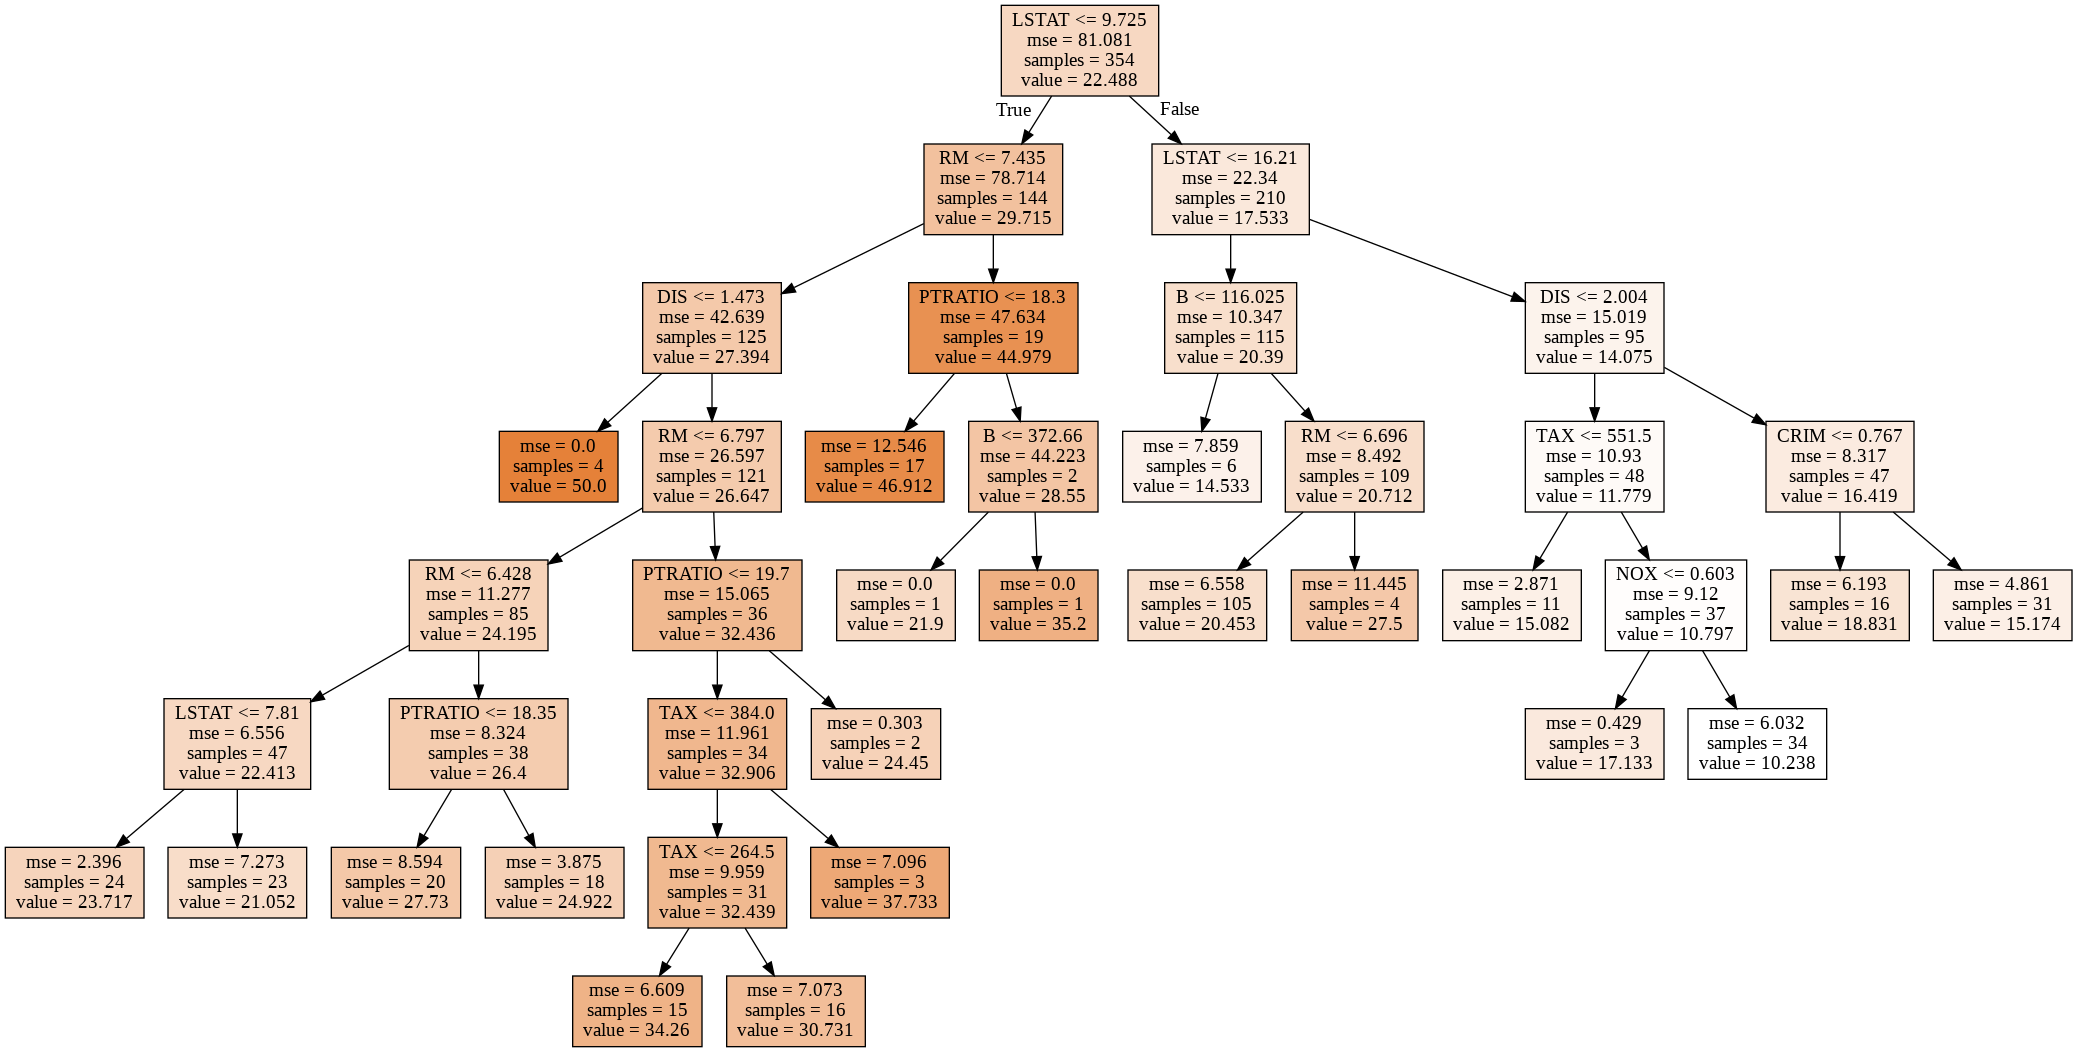

In [34]:
# ダイアグラムを描画
graph = pdp.graph_from_dot_data(dot_data)  

# ダイアグラムを表示
Image(graph.create_png())